In [5]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\si

Predicted prices for next month: 2024-04-01 00:00:00
Next month's price forecast:
Type of Rice      Forecasted Price
WELL-MILLED                55.7496
REGULAR-MILLED             48.1684
SPECIAL                    65.5518


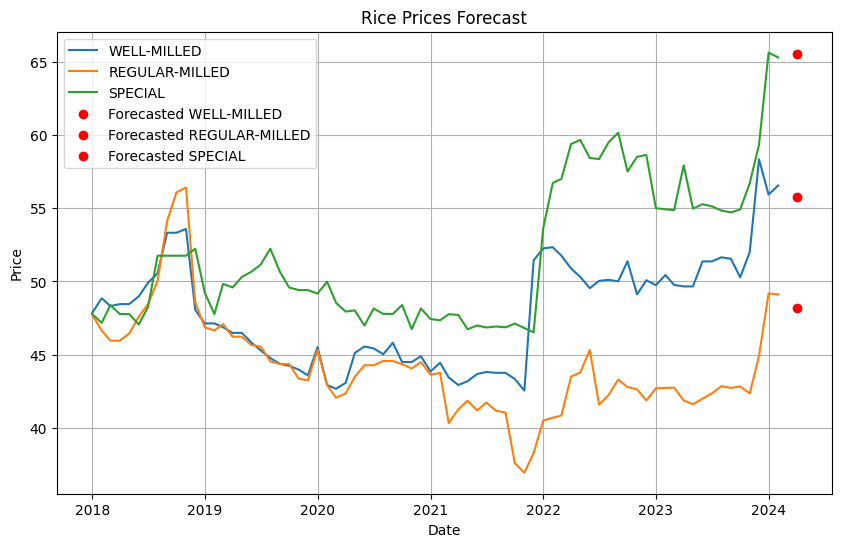

In [6]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from tabulate import tabulate
import matplotlib.pyplot as plt

# Read data from CSV file using file handling
rice_prices = []
with open('rice_prices.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        rice_prices.append(row)

# Convert data to DataFrame
df = pd.DataFrame(rice_prices)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.apply(pd.to_numeric)



# ARIMA model
def arima_model(series):
    model = ARIMA(series, order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=1)
    return forecast

# Predict next month's prices
next_month = pd.Timestamp(df.index[-1]) + pd.DateOffset(months=2)
next_month_prices = {}

for column in df.columns:
    forecast = arima_model(df[column])
    next_month_prices[column] = forecast.item()

print("Predicted prices for next month:", next_month)

forecast_df = pd.DataFrame(list(next_month_prices.items()), columns=['Type of Rice', 'Forecasted Price'])
# Display forecasted prices in a table
print("Next month's price forecast:")
print(tabulate(forecast_df, headers='keys', tablefmt='plain', showindex=False))

# Plot original data and forecasted values
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

for column in next_month_prices:
    label = f'Forecasted {column}'
    plt.scatter(next_month, next_month_prices[column], color='red', label=label)

plt.title("Rice Prices Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


WELL-MILLED
REGULAR-MILLED
SPECIAL

Forecasted prices for 2024:
+---------------+------------------+-----------+
|   WELL-MILLED |   REGULAR-MILLED |   SPECIAL |
+===============+==================+===========+
|       55.7496 |          48.1684 |   65.5518 |
+---------------+------------------+-----------+
|       55.5376 |          47.2083 |   66.1119 |
+---------------+------------------+-----------+
|       55.4266 |          47.2701 |   65.9064 |
+---------------+------------------+-----------+
|       55.5911 |          47.4242 |   65.3224 |
+---------------+------------------+-----------+
|       55.644  |          47.614  |   65.3514 |
+---------------+------------------+-----------+
|       55.6968 |          47.6015 |   65.3124 |
+---------------+------------------+-----------+
|       55.6882 |          47.5844 |   65.1909 |
+---------------+------------------+-----------+
|       55.673  |          47.5459 |   65.1987 |
+---------------+------------------+-----------+
|    

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is availab

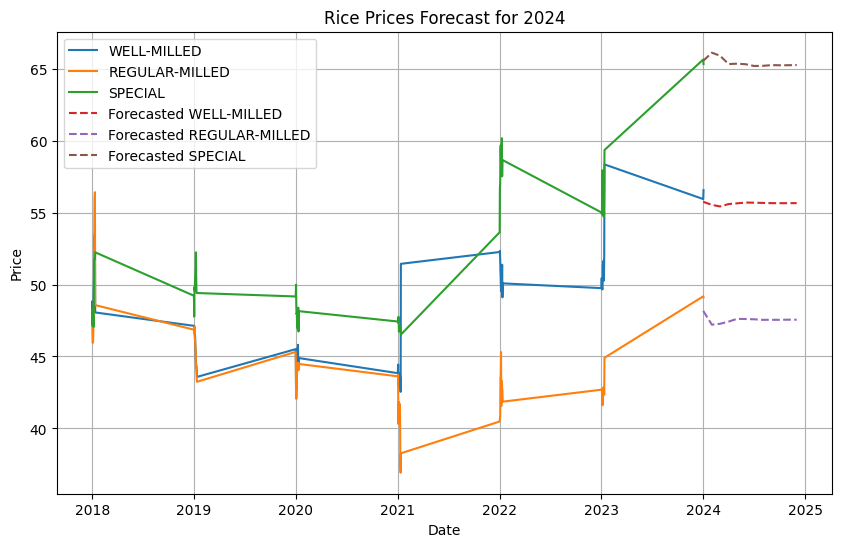

In [7]:
import csv
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from tabulate import tabulate
import matplotlib.pyplot as plt

# Read data from CSV file using file handling
rice_prices = []
with open('rice_prices.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        rice_prices.append(row)

# Convert data to DataFrame
df = pd.DataFrame(rice_prices)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.apply(pd.to_numeric)

# ARIMA model
def arima_model(series):
    model = ARIMA(series, order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=12)  # Forecast for the entire year
    return forecast

# Predict prices for 2025, 2026, and 2027
forecast_years = [2024]
for year in forecast_years:
    forecast_df = pd.DataFrame()
   
    for column in df.columns:
        forecast = arima_model(df[column])
        forecast_df[column] = forecast

    # Display forecasted prices in a table
    print(f"\nForecasted prices for {year}:")
    print(tabulate(forecast_df, headers='keys', tablefmt='grid', showindex=False))

    # Plot original data and forecasted values
    plt.figure(figsize=(10, 6))
    for column in df.columns:
        plt.plot(df.index, df[column], label=column)

    for column in forecast_df.columns:
        plt.plot(pd.date_range(start=f'{year}-01-01', periods=12, freq='MS'), forecast_df[column], linestyle='dashed', label=f'Forecasted {column}')

    plt.title(f"Rice Prices Forecast for {year}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()
